<a href="https://colab.research.google.com/github/PythonIndian/DL-01_66_Lab_Project/blob/main/DL_66_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Name : Devesh Vyas <BR>
Roll : 66 <BR>
Project : DL-Project <BR>
Practical: 09  <BR>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
! mv   "/content/data" '/content/drive/MyDrive/VIthSem/DeepLearningLab/DL_Project/'

In [ ]:
%%capture
#!unzip /content/drive/MyDrive/training_set.zip -d /content
#!unzip /content/drive/MyDrive/test_set.zip -d /content

path = '/content/drive/MyDrive/VIthSem/DeepLearningLab/DL_Project/"archive (17).zip"'
!unzip {path} -d /content

!mkdir data

path1 = '/content/"archive (17)"/tom_and_jerry/tom_and_jerry/jerry'
path2 = '/content/"archive (17)"/tom_and_jerry/tom_and_jerry/tom'
path3 = '/content/data'
! mv {path1} {path3}
! mv {path2} {path3}

! pip install split-folders
import splitfolders
splitfolders.ratio('/content/data', output="output", seed=1337, ratio=(.8, .2))

! mv /content/output/val /content/output/test

Populating the interactive namespace from numpy and matplotlib


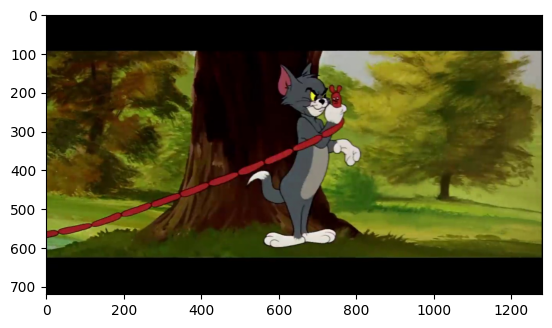

In [13]:
%pylab inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img=mpimg.imread('/content/output/test/tom/frame1000.jpg')
imgplot = plt.imshow(img)
plt.show()


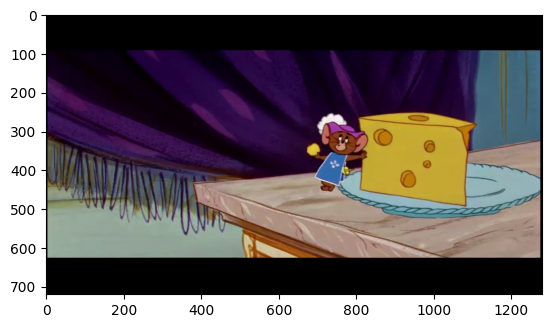

In [14]:
img=mpimg.imread('/content/output/test/jerry/frame100.jpg')
imgplot = plt.imshow(img)
plt.show()


In [15]:
import tensorflow
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D, Activation
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [16]:
img_width, img_height = 150,150  #width and height of the images
train_data_dir = r"/content/output/train"
validation_data_dir=r"/content/output/test"
nb_train_sample =100
nb_validation_samples =100
epochs =20
batch_size= 20

In [17]:
import tensorflow.keras.backend as k
if k.image_data_format()=='channels_first':
    input_shape=(3, img_width, img_height)
else:
    input_shape=(img_width,img_height,3)


In [32]:
#genrate training images
train_datagen=ImageDataGenerator ( rescale=1. /255,shear_range =0.2,zoom_range=0.2,horizontal_flip =True)
test_datagen=ImageDataGenerator (rescale=1. /255)
train_generator =train_datagen.flow_from_directory(train_data_dir,target_size =(img_width,img_height), batch_size=batch_size,class_mode='binary',classes=['tom','jerry'])
validation_generator =test_datagen.flow_from_directory(validation_data_dir,target_size =(img_width,img_height), batch_size=batch_size,class_mode='binary')


Found 2536 images belonging to 2 classes.
Found 634 images belonging to 2 classes.


In [20]:
# plt.figure(figsize=(12, 12))
# for i in range(0, 15):
#     plt.subplot(5, 3, i+1)
#     for X_batch, Y_batch in train_generator:
#         image = X_batch[0]
#         plt.imshow(image)
#         break
# plt.tight_layout()
# plt.show()

In [33]:
# CNN 1

model = Sequential()
model.add(Conv2D(64,(3,3),input_shape=input_shape))

model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(64))

model.add(Activation('relu'))
model.add(Dense(1))
model.add(Activation('sigmoid'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 148, 148, 64)      1792      
                                                                 
 activation_3 (Activation)   (None, 148, 148, 64)      0         
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 74, 74, 64)        0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 350464)            0         
                                                                 
 dense_2 (Dense)             (None, 64)                22429760  
                                                                 
 activation_4 (Activation)   (None, 64)                0         
                                                      

In [34]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 148, 148, 64)      1792      
                                                                 
 activation_3 (Activation)   (None, 148, 148, 64)      0         
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 74, 74, 64)        0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 350464)            0         
                                                                 
 dense_2 (Dense)             (None, 64)                22429760  
                                                                 
 activation_4 (Activation)   (None, 64)                0         
                                                      

In [35]:
training = model.fit_generator(
                   train_generator,
                   steps_per_epoch=nb_train_sample,epochs=epochs,
                   validation_data=validation_generator,
                   validation_steps=nb_validation_samples)

<ipython-input-35-6ec7d92ea1d4>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  training = model.fit_generator(


Epoch 1/20
100/100 [==============================] - ETA: 0s - loss: 1.8403 - accuracy: 0.6378

100/100 [==============================] - 24s 219ms/step - loss: 1.8403 - accuracy: 0.6378 - val_loss: 1.1044 - val_accuracy: 0.2192
Epoch 2/20
100/100 [==============================] - 16s 165ms/step - loss: 0.5518 - accuracy: 0.7325
Epoch 3/20
100/100 [==============================] - 18s 178ms/step - loss: 0.4926 - accuracy: 0.7680
Epoch 4/20
100/100 [==============================] - 18s 180ms/step - loss: 0.4561 - accuracy: 0.7841
Epoch 5/20
100/100 [==============================] - 17s 166ms/step - loss: 0.3931 - accuracy: 0.8272
Epoch 6/20
100/100 [==============================] - 18s 175ms/step - loss: 0.3785 - accuracy: 0.8345
Epoch 7/20
100/100 [==============================] - 16s 165ms/step - loss: 0.3577 - accuracy: 0.8402
Epoch 8/20
100/100 [==============================] - 17s 169ms/step - loss: 0.3260 - accuracy: 0.8607
Epoch 9/20
100/100 [==============================] - 16s 163ms/step - loss: 0.3264 - accuracy: 0.8622
Epoch 10/20
100/100 [=====================

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


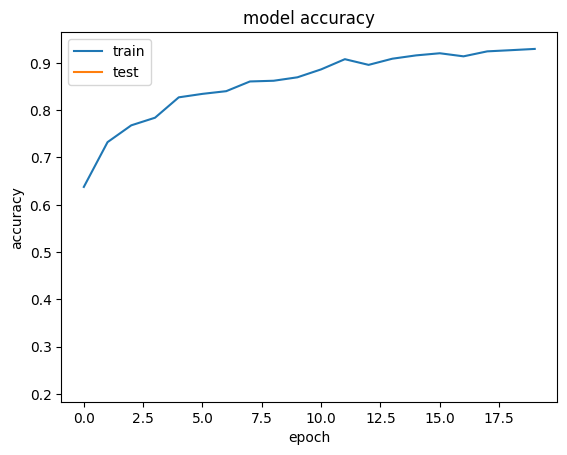

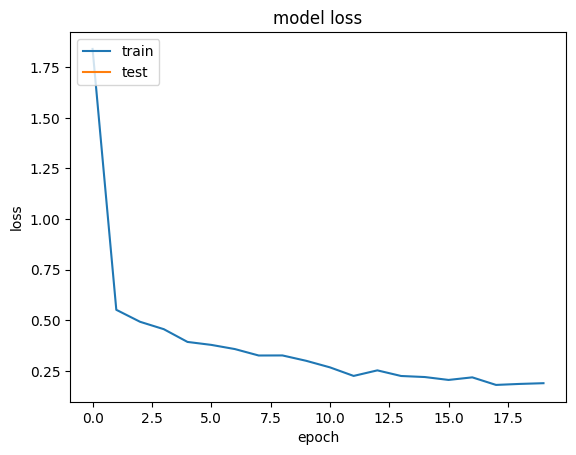

In [36]:
import matplotlib.pyplot as plt
%matplotlib inline

print(training.history.keys())

plt.plot(training.history['accuracy'])
plt.plot(training.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


plt.plot(training.history['loss'])
plt.plot(training.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


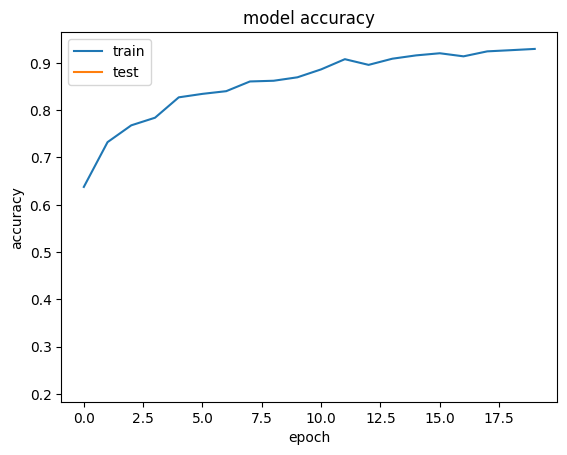

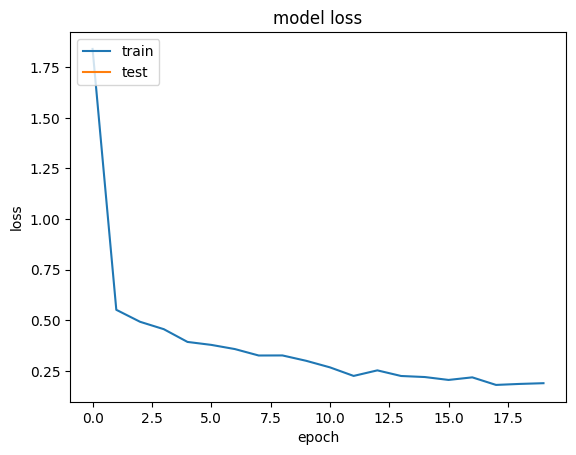

In [37]:
import matplotlib.pyplot as plt
%matplotlib inline

print(training.history.keys())

plt.plot(training.history['accuracy'])
plt.plot(training.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(training.history['loss'])
plt.plot(training.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

1/1 [==============================] - 0s 18ms/step
[[0.]]
Prediction:  tom


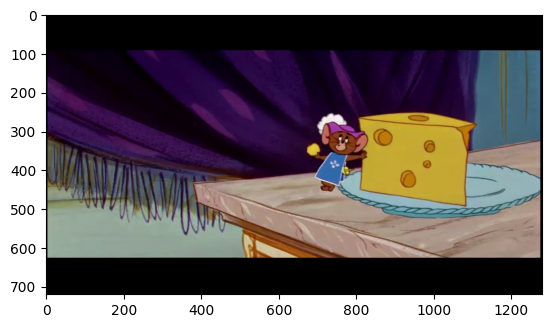

In [40]:
from tensorflow.keras.preprocessing import image
import numpy as np
img_pred = image.load_img("/content/output/test/jerry/frame100.jpg",target_size=(150,150))

img_pred=image.img_to_array(img_pred)
img_pred=np.expand_dims(img_pred, axis=0)

rslt = model.predict(img_pred)
print(rslt)
if rslt[0][0]==1:
    prediction ="jerry"
else:
    prediction ="tom"
print('Prediction: ',prediction)

img=mpimg.imread('/content/output/test/jerry/frame100.jpg')
imgplot = plt.imshow(img)
plt.show()


1/1 [==============================] - 0s 19ms/step
[[0.]]
Prediction:  tom


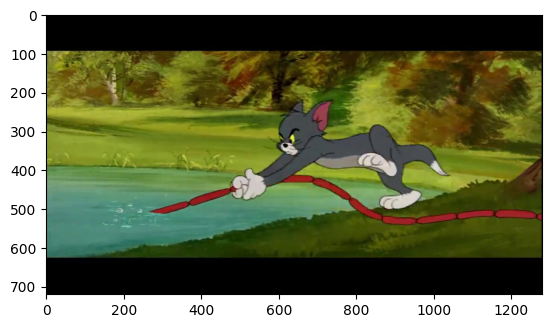

In [39]:
img_pred = image.load_img("/content/output/test/tom/frame1006.jpg",target_size=(150,150))

img_pred=image.img_to_array(img_pred)
img_pred=np.expand_dims(img_pred, axis=0)

rslt = model.predict(img_pred)
print(rslt)
if rslt[0][0]==1:
    prediction ="jerry"
else:
    prediction ="tom"
print('Prediction: ',prediction)

img=mpimg.imread('/content/output/test/tom/frame1006.jpg')
imgplot = plt.imshow(img)
plt.show()

In [41]:
# CNN 2

from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Activation, BatchNormalization
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
earlystop = EarlyStopping(patience=10)
# ReduceLROnPlateau: Reduce learning rate when a metric has stopped improving
learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc',
                                            patience=2,
                                            verbose=1,
                                            factor=0.5,
                                            min_lr=0.00001)


callbacks = [earlystop, learning_rate_reduction]

model1 = Sequential()
model1 = Sequential()
model1.add(Conv2D(64,(3,3),input_shape=input_shape)) #64 neurons with 3*3 filter
model1.add(Activation('relu'))
model1.add(MaxPooling2D(pool_size=(2,2)))
model1.add(Flatten())
model1.add(Dense(64)) #64 neurons with 3*3 filter
model1.add(Activation('relu'))
model1.add(Dropout(0.5))#Prevents overfitting of the model and it has the effect of reducing the capacity or thinning the network during training
model1.add(Dense(1)) #output layer
model1.add(Activation('sigmoid')) #sigmoid activation function
model1.summary()


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 148, 148, 64)      1792      
                                                                 
 activation_6 (Activation)   (None, 148, 148, 64)      0         
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 74, 74, 64)        0         
 g2D)                                                            
                                                                 
 flatten_2 (Flatten)         (None, 350464)            0         
                                                                 
 dense_4 (Dense)             (None, 64)                22429760  
                                                                 
 activation_7 (Activation)   (None, 64)                0         
                                                      

In [43]:
model1.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model1.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 148, 148, 64)      1792      
                                                                 
 activation_6 (Activation)   (None, 148, 148, 64)      0         
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 74, 74, 64)        0         
 g2D)                                                            
                                                                 
 flatten_2 (Flatten)         (None, 350464)            0         
                                                                 
 dense_4 (Dense)             (None, 64)                22429760  
                                                                 
 activation_7 (Activation)   (None, 64)                0         
                                                      

In [44]:
training = model1.fit_generator(train_generator,
                   steps_per_epoch=nb_train_sample,epochs=epochs,
                   validation_data=validation_generator,
                       validation_steps=nb_validation_samples,callbacks=callbacks)

<ipython-input-44-ef346db75b1a>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  training = model1.fit_generator(train_generator,


Epoch 1/20
100/100 [==============================] - ETA: 0s - loss: 0.9271 - accuracy: 0.5802

100/100 [==============================] - 25s 217ms/step - loss: 0.9271 - accuracy: 0.5802 - val_loss: 0.7458 - val_accuracy: 0.3912 - lr: 0.0010
Epoch 2/20
100/100 [==============================] - ETA: 0s - loss: 0.6417 - accuracy: 0.6152

100/100 [==============================] - 18s 176ms/step - loss: 0.6417 - accuracy: 0.6152 - lr: 0.0010
Epoch 3/20
100/100 [==============================] - ETA: 0s - loss: 0.6242 - accuracy: 0.6142

100/100 [==============================] - 17s 169ms/step - loss: 0.6242 - accuracy: 0.6142 - lr: 0.0010
Epoch 4/20
100/100 [==============================] - ETA: 0s - loss: 0.5930 - accuracy: 0.6273

100/100 [==============================] - 18s 183ms/step - loss: 0.5930 - accuracy: 0.6273 - lr: 0.0010
Epoch 5/20
100/100 [==============================] - ETA: 0s - loss: 0.5973 - accuracy: 0.6548

100/100 [==============================] - 17s 170ms/step - loss: 0.5973 - accuracy: 0.6548 - lr: 0.0010
Epoch 6/20
100/100 [==============================] - ETA: 0s - loss: 0.5861 - accuracy: 0.6668

100/100 [==============================] - 17s 172ms/step - loss: 0.5861 - accuracy: 0.6668 - lr: 0.0010
Epoch 7/20
100/100 [==============================] - ETA: 0s - loss: 0.5656 - accuracy: 0.6733

100/100 [==============================] - 18s 180ms/step - loss: 0.5656 - accuracy: 0.6733 - lr: 0.0010
Epoch 8/20
100/100 [==============================] - ETA: 0s - loss: 0.5575 - accuracy: 0.6894

100/100 [==============================] - 16s 164ms/step - loss: 0.5575 - accuracy: 0.6894 - lr: 0.0010
Epoch 9/20
100/100 [==============================] - ETA: 0s - loss: 0.5267 - accuracy: 0.6929

100/100 [==============================] - 17s 166ms/step - loss: 0.5267 - accuracy: 0.6929 - lr: 0.0010
Epoch 10/20
100/100 [==============================] - ETA: 0s - loss: 0.5119 - accuracy: 0.7159

100/100 [==============================] - 18s 175ms/step - loss: 0.5119 - accuracy: 0.7159 - lr: 0.0010
Epoch 11/20
100/100 [==============================] - ETA: 0s - loss: 0.5009 - accuracy: 0.7330

100/100 [==============================] - 16s 164ms/step - loss: 0.5009 - accuracy: 0.7330 - lr: 0.0010
Epoch 12/20
100/100 [==============================] - ETA: 0s - loss: 0.4799 - accuracy: 0.7455

100/100 [==============================] - 17s 166ms/step - loss: 0.4799 - accuracy: 0.7455 - lr: 0.0010
Epoch 13/20
100/100 [==============================] - ETA: 0s - loss: 0.4764 - accuracy: 0.7325

100/100 [==============================] - 17s 174ms/step - loss: 0.4764 - accuracy: 0.7325 - lr: 0.0010
Epoch 14/20
100/100 [==============================] - ETA: 0s - loss: 0.4655 - accuracy: 0.7430

100/100 [==============================] - 16s 163ms/step - loss: 0.4655 - accuracy: 0.7430 - lr: 0.0010
Epoch 15/20
100/100 [==============================] - ETA: 0s - loss: 0.4772 - accuracy: 0.7535

100/100 [==============================] - 18s 178ms/step - loss: 0.4772 - accuracy: 0.7535 - lr: 0.0010
Epoch 16/20
100/100 [==============================] - ETA: 0s - loss: 0.4440 - accuracy: 0.7756

100/100 [==============================] - 16s 164ms/step - loss: 0.4440 - accuracy: 0.7756 - lr: 0.0010
Epoch 17/20
100/100 [==============================] - ETA: 0s - loss: 0.4115 - accuracy: 0.7856

100/100 [==============================] - 17s 173ms/step - loss: 0.4115 - accuracy: 0.7856 - lr: 0.0010
Epoch 18/20
100/100 [==============================] - ETA: 0s - loss: 0.4159 - accuracy: 0.7901

100/100 [==============================] - 17s 166ms/step - loss: 0.4159 - accuracy: 0.7901 - lr: 0.0010
Epoch 19/20
100/100 [==============================] - ETA: 0s - loss: 0.4134 - accuracy: 0.7961

100/100 [==============================] - 17s 167ms/step - loss: 0.4134 - accuracy: 0.7961 - lr: 0.0010
Epoch 20/20
100/100 [==============================] - ETA: 0s - loss: 0.4220 - accuracy: 0.7946

100/100 [==============================] - 18s 178ms/step - loss: 0.4220 - accuracy: 0.7946 - lr: 0.0010


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy', 'lr'])


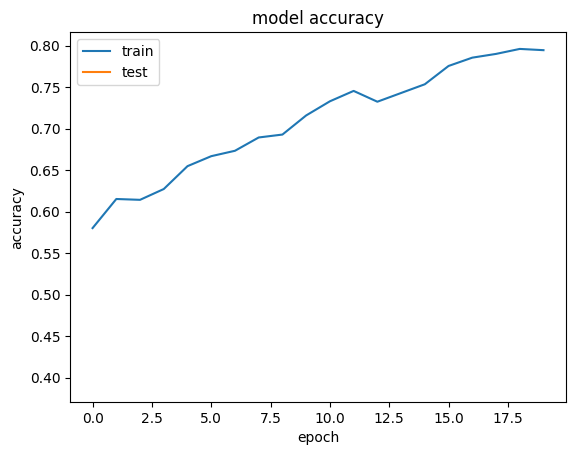

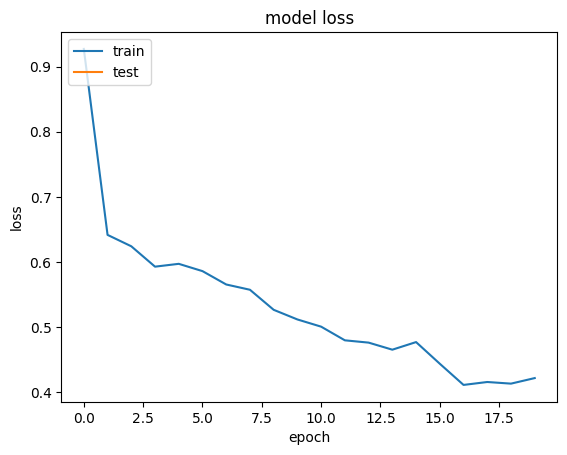

In [46]:
import matplotlib.pyplot as plt
%matplotlib inline
# list all data in training
print(training.history.keys())
# summarize training for accuracy
plt.plot(training.history['accuracy'])
plt.plot(training.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize traning for loss
plt.plot(training.history['loss'])
plt.plot(training.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

1/1 [==============================] - 0s 19ms/step
[[1.]]
Prediction:  jerry


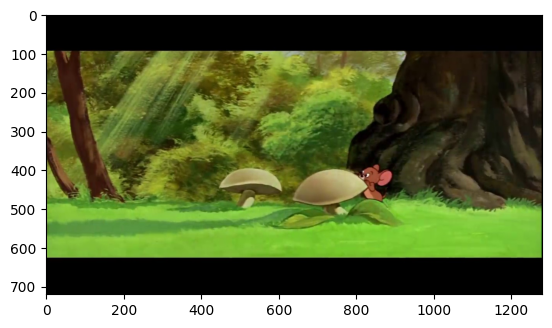

In [48]:
from tensorflow.keras.preprocessing import image
import numpy as np
img_pred = image.load_img("/content/output/test/jerry/frame1036.jpg",target_size=(150,150))

img_pred=image.img_to_array(img_pred)
img_pred=np.expand_dims(img_pred, axis=0)

result = model1.predict(img_pred)
print(result)
if result[0][0]==1:
    prediction ="jerry"
else:
    prediction ="tom"
print('Prediction: ',prediction)

img=mpimg.imread('/content/output/test/jerry/frame1036.jpg')
imgplot = plt.imshow(img)
plt.show()


1/1 [==============================] - 0s 18ms/step
[[0.]]
Prediction:  tom


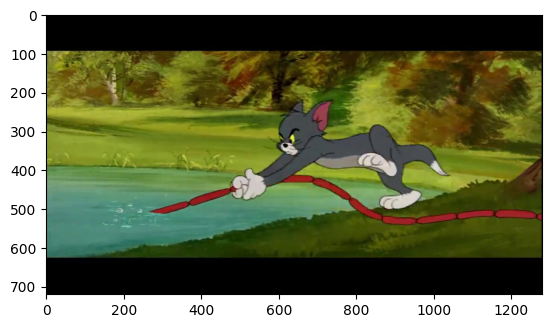

In [50]:
img_pred = image.load_img("/content/output/test/tom/frame1006.jpg",target_size=(150,150))

img_pred=image.img_to_array(img_pred)
img_pred=np.expand_dims(img_pred, axis=0)

rslt = model1.predict(img_pred)
print(rslt)
if rslt[0][0]==1:
    prediction ="jerry"
else:
    prediction ="tom"
print('Prediction: ',prediction)

img=mpimg.imread('/content/output/test/tom/frame1006.jpg')
imgplot = plt.imshow(img)
plt.show()


In [51]:
# CNN 3

from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Activation, BatchNormalization
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
earlystop = EarlyStopping(patience=10)

learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc',
                                            patience=2,
                                            verbose=1,
                                            factor=0.5,
                                            min_lr=0.00001)


callbacks = [earlystop, learning_rate_reduction]

model2 = Sequential()
model2.add(Conv2D(32,(3,3),input_shape=input_shape))

model2.add(BatchNormalization())
model2.add(MaxPooling2D(pool_size=(2, 2)))
model2.add(Dropout(0.25))

model2.add(Conv2D(64, (3, 3), activation='relu'))
model2.add(BatchNormalization())
model2.add(MaxPooling2D(pool_size=(2, 2)))
model2.add(Dropout(0.25))

model2.add(Conv2D(128, (3, 3), activation='relu'))
model2.add(BatchNormalization())
model2.add(MaxPooling2D(pool_size=(2, 2)))
model2.add(Dropout(0.25))

model2.add(Flatten())
model2.add(Dense(512, activation='relu'))
model2.add(BatchNormalization())
model2.add(Dropout(0.5))
model2.add(Dense(1, activation='softmax'))




In [52]:
model2.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model2.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 batch_normalization (Batch  (None, 148, 148, 32)      128       
 Normalization)                                                  
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 74, 74, 32)        0         
 g2D)                                                            
                                                                 
 dropout_1 (Dropout)         (None, 74, 74, 32)        0         
                                                                 
 conv2d_4 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 batch_normalization_1 (Bat  (None, 72, 72, 64)       

In [53]:
training = model2.fit_generator(train_generator,
                   steps_per_epoch=nb_train_sample,epochs=epochs,
                   validation_data=validation_generator,
                       validation_steps=nb_validation_samples,callbacks=callbacks)

<ipython-input-53-e326fc04b449>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  training = model2.fit_generator(train_generator,


Epoch 1/20
100/100 [==============================] - ETA: 0s - loss: 0.8776 - accuracy: 0.3880

100/100 [==============================] - 25s 197ms/step - loss: 0.8776 - accuracy: 0.3880 - val_loss: 3.5273 - val_accuracy: 0.6088 - lr: 0.0010
Epoch 2/20
100/100 [==============================] - ETA: 0s - loss: 0.5746 - accuracy: 0.3928

100/100 [==============================] - 18s 184ms/step - loss: 0.5746 - accuracy: 0.3928 - lr: 0.0010
Epoch 3/20
100/100 [==============================] - ETA: 0s - loss: 0.4512 - accuracy: 0.3893

100/100 [==============================] - 18s 178ms/step - loss: 0.4512 - accuracy: 0.3893 - lr: 0.0010
Epoch 4/20
100/100 [==============================] - ETA: 0s - loss: 0.3496 - accuracy: 0.3888

100/100 [==============================] - 17s 173ms/step - loss: 0.3496 - accuracy: 0.3888 - lr: 0.0010
Epoch 5/20
100/100 [==============================] - ETA: 0s - loss: 0.3173 - accuracy: 0.3858

100/100 [==============================] - 19s 192ms/step - loss: 0.3173 - accuracy: 0.3858 - lr: 0.0010
Epoch 6/20
100/100 [==============================] - ETA: 0s - loss: 0.2731 - accuracy: 0.3893

100/100 [==============================] - 19s 187ms/step - loss: 0.2731 - accuracy: 0.3893 - lr: 0.0010
Epoch 7/20
100/100 [==============================] - ETA: 0s - loss: 0.2307 - accuracy: 0.3898

100/100 [==============================] - 18s 176ms/step - loss: 0.2307 - accuracy: 0.3898 - lr: 0.0010
Epoch 8/20
100/100 [==============================] - ETA: 0s - loss: 0.2481 - accuracy: 0.3853

100/100 [==============================] - 18s 176ms/step - loss: 0.2481 - accuracy: 0.3853 - lr: 0.0010
Epoch 9/20
100/100 [==============================] - ETA: 0s - loss: 0.2039 - accuracy: 0.3863

100/100 [==============================] - 17s 173ms/step - loss: 0.2039 - accuracy: 0.3863 - lr: 0.0010
Epoch 10/20
100/100 [==============================] - ETA: 0s - loss: 0.1736 - accuracy: 0.3943

100/100 [==============================] - 18s 182ms/step - loss: 0.1736 - accuracy: 0.3943 - lr: 0.0010
Epoch 11/20
100/100 [==============================] - ETA: 0s - loss: 0.1559 - accuracy: 0.3975

100/100 [==============================] - 18s 178ms/step - loss: 0.1559 - accuracy: 0.3975 - lr: 0.0010
Epoch 12/20
100/100 [==============================] - ETA: 0s - loss: 0.1796 - accuracy: 0.3908

100/100 [==============================] - 18s 177ms/step - loss: 0.1796 - accuracy: 0.3908 - lr: 0.0010
Epoch 13/20
100/100 [==============================] - ETA: 0s - loss: 0.1558 - accuracy: 0.3973

100/100 [==============================] - 17s 173ms/step - loss: 0.1558 - accuracy: 0.3973 - lr: 0.0010
Epoch 14/20
100/100 [==============================] - ETA: 0s - loss: 0.1387 - accuracy: 0.3920

100/100 [==============================] - 19s 188ms/step - loss: 0.1387 - accuracy: 0.3920 - lr: 0.0010
Epoch 15/20
100/100 [==============================] - ETA: 0s - loss: 0.1325 - accuracy: 0.3880

100/100 [==============================] - 17s 171ms/step - loss: 0.1325 - accuracy: 0.3880 - lr: 0.0010
Epoch 16/20
100/100 [==============================] - ETA: 0s - loss: 0.1132 - accuracy: 0.3895

100/100 [==============================] - 18s 182ms/step - loss: 0.1132 - accuracy: 0.3895 - lr: 0.0010
Epoch 17/20
100/100 [==============================] - ETA: 0s - loss: 0.1193 - accuracy: 0.3908

100/100 [==============================] - 18s 175ms/step - loss: 0.1193 - accuracy: 0.3908 - lr: 0.0010
Epoch 18/20
100/100 [==============================] - ETA: 0s - loss: 0.1117 - accuracy: 0.3873

100/100 [==============================] - 17s 173ms/step - loss: 0.1117 - accuracy: 0.3873 - lr: 0.0010
Epoch 19/20
100/100 [==============================] - ETA: 0s - loss: 0.1053 - accuracy: 0.3918

100/100 [==============================] - 20s 203ms/step - loss: 0.1053 - accuracy: 0.3918 - lr: 0.0010
Epoch 20/20
100/100 [==============================] - ETA: 0s - loss: 0.0997 - accuracy: 0.3888

100/100 [==============================] - 17s 173ms/step - loss: 0.0997 - accuracy: 0.3888 - lr: 0.0010


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy', 'lr'])


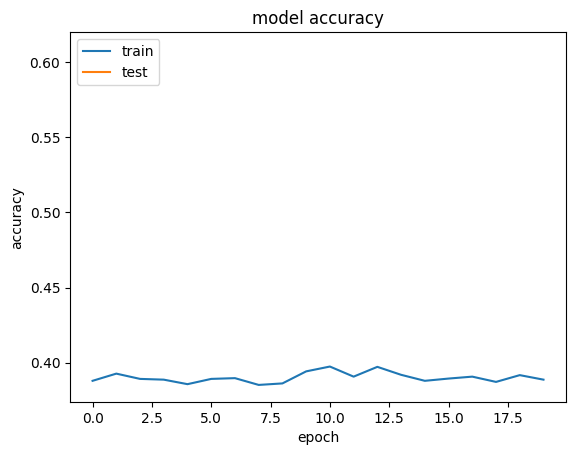

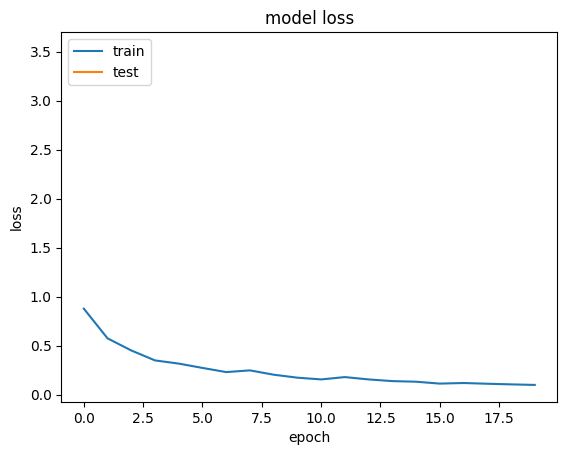

In [54]:
import matplotlib.pyplot as plt
%matplotlib inline

print(training.history.keys())

plt.plot(training.history['accuracy'])
plt.plot(training.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(training.history['loss'])
plt.plot(training.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

#### <b> Predict the image


1/1 [==============================] - 0s 322ms/step
[[1.]]
Prediction:  jerry


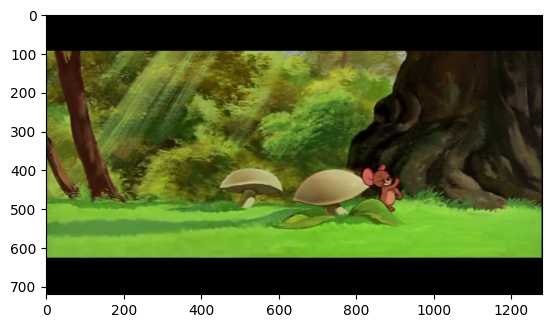

In [55]:
from tensorflow.keras.preprocessing import image
import numpy as np
img_pred = image.load_img("/content/output/test/jerry/frame1038.jpg",target_size=(150,150))

img_pred=image.img_to_array(img_pred)
img_pred=np.expand_dims(img_pred, axis=0)

result = model2.predict(img_pred)
print(result)
if result[0][0]==1:
    prediction ="jerry"
else:
    prediction ="tom"
print('Prediction: ',prediction)

img=mpimg.imread('/content/output/test/jerry/frame1038.jpg')
imgplot = plt.imshow(img)
plt.show()


1/1 [==============================] - 0s 19ms/step
[[1.]]
Prediction:  jerry


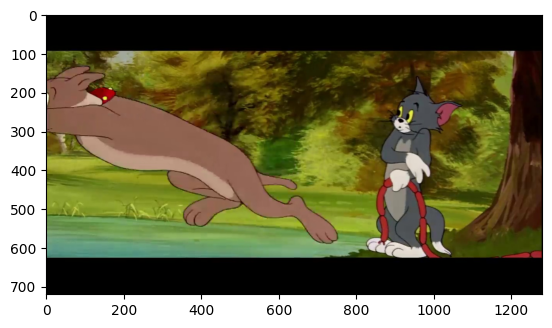

In [58]:
img_pred = image.load_img("/content/output/test/tom/frame1015.jpg",target_size=(150,150))

img_pred=image.img_to_array(img_pred)
img_pred=np.expand_dims(img_pred, axis=0)

rslt = model2.predict(img_pred)
print(rslt)
if rslt[0][0]==1:
    prediction ="jerry"
else:
    prediction ="tom"
print('Prediction: ',prediction)

img=mpimg.imread('/content/output/test/tom/frame1015.jpg')
imgplot = plt.imshow(img)
plt.show()
